In [1]:
import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
import geopandas as gpd
import os

(11.752224899226979, 19.197705307582247, 48.42669875098691, 51.180969241694406)

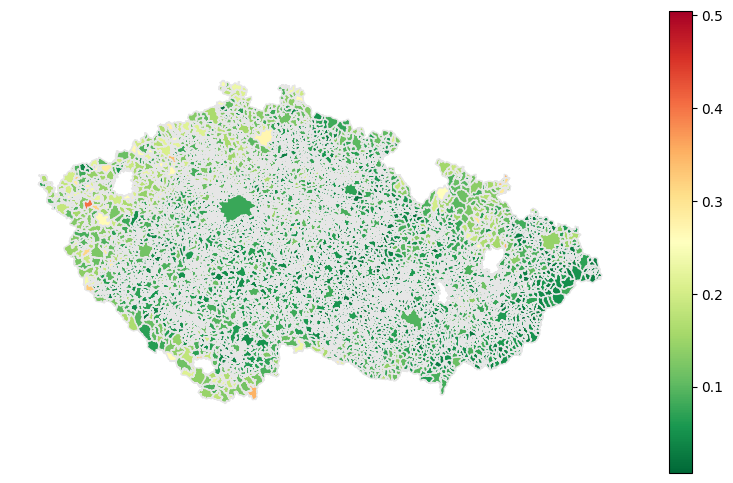

In [33]:
geo_file_path = 'files/OBCE_P-wgs84.shp'

# https://towardsdatascience.com/plot-choropleth-maps-with-shapefiles-using-geopandas-a6bf6ade0a49
# https://towardsdatascience.com/how-to-visualize-data-on-top-of-a-map-in-python-using-the-geoviews-library-part-2-e61a48ee6c3d
# https://data.gov.cz/články/kartogram-choropleth
shapes_df = gpd.read_file(geo_file_path, driver='ESRI Shapefile')
shapes_df = shapes_df.rename(columns={'KOD': 'kod_obec', 'NAZEV': 'nazev_obec'})
shapes_df.head()

# types 

shapes_df = shapes_df[['kod_obec', 'nazev_obec', 'geometry']]
# convert kod_obec to int and nazev_obec to string
shapes_df['kod_obec'] = shapes_df['kod_obec'].astype(int)
shapes_df['nazev_obec'] = shapes_df['nazev_obec'].astype(str)
# shapes_df.plot(figsize=(20, 10))

df_census = pd.read_csv('../geodata/census11_21/data_obce_vyhl_nevyhl.csv', sep=',')
df_dluhy = pd.read_csv('../geodata/score/obce_skore_rizikovosti.csv', sep=';')
df = pd.merge(df_census, df_dluhy, on='OBEC_KOD', how='inner')    
df = df.rename(columns={'OBEC_KOD': 'kod_obec', 'vzdelani_bez_mean': 'Bez vzdělání', 'vzdelani_zakl_mean': 'Základní vzdělání', 'vzdelani_str_bm_mean': 'Středoškolské vzdělání bez maturity', 'vzdelani_str_np_mean': 'Středoškolské vzdělání s maturitou', 'vzdelani_vo_mean': 'Vyšší odborné vzdělání', 'vzdelani_vys_mean': 'Vysokoškolské vzdělání'  })
shapes_df.dtypes

df_merged = shapes_df.merge(df, on='kod_obec')

re_bins = [0, 0.040198, 0.059055, 0.087146, 0.504834]
re_labels = ['0-4%', '4-6%', '6-9%', '9-50%']
df_merged['re_bins'] = pd.cut(df_merged['re'], bins=re_bins, labels=re_labels, include_lowest=True)


df_merged.head()

fig, ax = plt.subplots(1, figsize=(10,6))
df_merged.plot(column='re', linewidth=1, ax=ax, edgecolor='0.9', legend = True, cmap='RdYlGn_r')
ax.axis('off')

# df_merged['re'].describe()